# Exploring the Latest Dataset from Lyft-Bikes (06/2020)
## by Juan Garcia

## Preliminary Wrangling

This is a Lyft Dataset of San Francisco Bay, which has the trips information of the last month (June 2020). All trips are anonymized and include:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('202006-baywheels-tripdata.csv')

### Assessing the Data

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB
None


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [4]:
df.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [5]:
df.member_casual.unique()

array(['casual', 'member'], dtype=object)

### Necesary changes

#### Quality
- Columns `started_at` and `ended_at` are not of type "date time"
- Columns `start_station_name` and `end_station_name` are not needed since we already have the `stations ids`
- Columns regarding longitude and latitude are not necessary for our analysis

### Cleaning the Data

In [48]:
# create a copy of the dataset
df_clean = df.copy()

Change the columns `started_at` and `ended_at` to the typ datetime using `pd.to_datetime()` command

In [49]:
df_clean.started_at = pd.to_datetime(df_clean.started_at)

In [50]:
df_clean.ended_at = pd.to_datetime(df_clean.ended_at)

In [51]:
# test that this worked
df_clean.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

Drop all unnecesary columns of the dataset: start_station_name, end_station_name, start_lat, end_lat, start_lng, end_lng

In [52]:
# drop the columns
df_clean.drop(columns=['start_station_name', 'end_station_name', 'start_lat', 'end_lat', 'start_lng', 'end_lng'],
              inplace=True)

In [67]:
# Test columns where successfully dropped
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156550 entries, 0 to 158167
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ride_id           156550 non-null  object        
 1   rideable_type     156550 non-null  object        
 2   started_at        156550 non-null  datetime64[ns]
 3   ended_at          156550 non-null  datetime64[ns]
 4   start_station_id  97782 non-null   float64       
 5   end_station_id    96017 non-null   float64       
 6   member_casual     156550 non-null  object        
 7   ride_dur          156550 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 10.7+ MB


Feature Engineering:
- create a feature that reflects the duration of a ride
- create a feature that shows the weekday the bike was rented
- create a feature that shows the time the bike was rented

In [54]:
df_clean['ride_dur'] = df_clean.ended_at - df_clean.started_at
df_clean['ride_dur'].describe()

count                    158168
mean     0 days 00:26:56.991003
std      0 days 05:08:18.265074
min           -1 days +23:45:57
25%             0 days 00:07:22
50%             0 days 00:13:15
75%             0 days 00:23:21
max            25 days 20:33:06
Name: ride_dur, dtype: object

No ride should be negative, that is why we will drop all the rows containing negative times. Furthermore, it looks like there are some outliers. For this we will look at the distribution

In [55]:
# get rid of all the negative values
df_clean = df_clean.loc[df_clean.ride_dur >= '0']

In [56]:
# transform the date time factor to minutes as a float
df_clean.ride_dur = (df_clean.ride_dur / np.timedelta64(1, 's'))/60

In [57]:
# get the summary statistics
df_clean.ride_dur.describe()

count    158133.000000
mean         26.956052
std         308.338250
min           0.000000
25%           7.366667
50%          13.250000
75%          23.350000
max       37233.100000
Name: ride_dur, dtype: float64

(0.0, 5e-06)

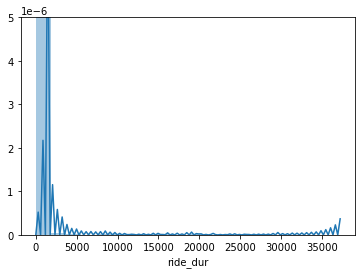

In [58]:
# take a look at the distribution
sns.distplot(df_clean.ride_dur, bins=20)
plt.ylim((0,0.000005))

In [59]:
# Drop all outliers: identify the 99 percentile and drop all values above
np.percentile(df_clean.ride_dur, 99)

126.35

In [60]:
# Drop all values above the 99 percentile
df_clean = df_clean.loc[df_clean.ride_dur < 126.35]

Text(0.5, 0, 'Ride Duration')

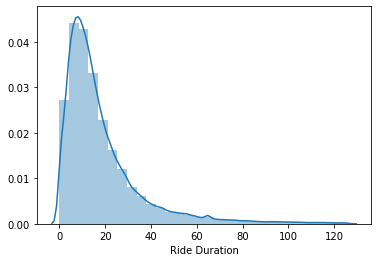

In [63]:
# Test: get a view of the distribution of the revised dataset
sns.distplot(df_clean.ride_dur, bins=30)
plt.xlabel('Ride Duration')

Create a new feature that shows the day of the week the bike was rented

In [100]:
# create a feature that shows the weekday the bike was rented
df_clean['week_day'] = df_clean['started_at'].dt.dayofweek

In [101]:
# test the new created feature
df_clean['week_day'].value_counts()

5    25739
1    23670
6    22498
2    21999
0    21937
4    21456
3    19251
Name: week_day, dtype: int64

In [91]:
# Create a dictionary for the days of the week
days_dict = {0: 'Monday', 
            1: 'Tuesday',
            2: 'Wednesday',
            3: 'Thursday',
            4: 'Friday',
            5: 'Saturday',
            6: 'Sunday'}

In [102]:
# replace the numbers with categories
df_clean['week_day'].replace(days_dict, inplace=True) 

In [103]:
# test new feature worked
df_clean.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,ride_dur,week_day,hour_of_day
137915,F4C6453ABA01DD33,electric_bike,2020-06-11 13:53:03,2020-06-11 14:14:51,387.0,482.0,member,21.800000,Thursday,13
73044,70F5181FF9BC5DE4,docked_bike,2020-06-14 16:57:26,2020-06-14 17:44:37,458.0,116.0,member,47.183333,Sunday,16
19239,A216C1E6C6CEC644,electric_bike,2020-06-03 13:22:06,2020-06-03 13:36:27,77.0,NaN,casual,14.350000,Wednesday,13
51273,F4BE3611E552571A,electric_bike,2020-06-21 13:50:40,2020-06-21 14:05:04,516.0,486.0,casual,14.400000,Sunday,13
112059,E72C802BFB0A1FAD,docked_bike,2020-06-27 10:43:49,2020-06-27 10:53:12,186.0,197.0,casual,9.383333,Saturday,10


In [104]:
# change data type to category since the days follow an order
day_order = ['Monday', 
             'Tuesday',
             'Wednesday',
             'Thursday',
             'Friday',
             'Saturday',
             'Sunday']
ordered_day = pd.api.types.CategoricalDtype(ordered=True, categories=day_order)
df_clean['week_day'] = df_clean['week_day'].astype(ordered_day)

In [105]:
# test 
df_clean.week_day.dtypes

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 ordered=True)

The new feature `week_day` is ready for the analysis

Create a new feature that shows the hour of the day (24 hours) a bike is rented

In [126]:
# create the new feature with the hour of the day a bike is rented
df_clean['hour_of_day'] = df_clean.started_at.dt.hour

In [127]:
# test the new feature was created successfully
df_clean.hour_of_day.value_counts().sort_index()

0      1115
1       737
2       607
3       503
4       548
5       920
6      2262
7      4275
8      5438
9      6052
10     6920
11     8704
12    10722
13    11450
14    12403
15    13022
16    13873
17    15822
18    14535
19    11622
20     6957
21     3759
22     2606
23     1698
Name: hour_of_day, dtype: int64

In [123]:
# make a category variable for the rest the analysis
df_clean.hour_of_day.value_counts().sort_index().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [129]:
order_hour = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23]
hour_ordered = pd.api.types.CategoricalDtype(ordered=True, categories=order_hour)
df_clean.hour_of_day = df_clean.hour_of_day.astype(hour_ordered)

In [130]:
# test new feater was created successfully
df_clean.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,ride_dur,week_day,hour_of_day
120551,9F30B651BEBA244E,docked_bike,2020-06-13 14:39:59,2020-06-13 14:45:27,370.0,3.0,member,5.466667,Saturday,14
14241,B121C28D1D62380F,electric_bike,2020-06-25 13:25:23,2020-06-25 13:37:19,61.0,120.0,casual,11.933333,Thursday,13
3139,F0E4675848FE9D54,electric_bike,2020-06-13 09:59:05,2020-06-13 10:31:12,104.0,377.0,casual,32.116667,Saturday,9
94648,050CB072D5EE7FD8,docked_bike,2020-06-18 18:04:00,2020-06-18 18:30:41,294.0,301.0,casual,26.683333,Thursday,18
145249,4F4F366FE199FA6C,docked_bike,2020-06-01 17:17:48,2020-06-01 17:38:23,138.0,138.0,member,20.583333,Monday,17


New variable hour_of_day was created successfully and is ready to be analyzed

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are those who help explain the variation in the *duration of the ride* (`ride_dur`). (To be explored) a possible second dependent variable could be the *type of bike* (`rideble_type`), also figuring out what does predict the choice

## Univariate Exploration

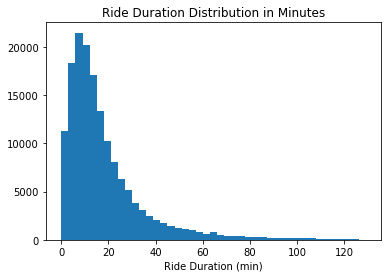

In [66]:
# take a deeper look at the distribution of the ride_dur variable
bins_dur_size = 3 # bins the size of 5 min
bins_dur = np.arange(0, df_clean.ride_dur.max()+bins_dur_size, bins_dur_size)

plt.hist(data=df_clean, x='ride_dur', bins=bins_dur)
plt.xlabel('Ride Duration (min)')
plt.title('Ride Duration Distribution in Minutes');

The distribution is right skewed. Be careful when comparing to other variables since most of the observations are between 0 and 30 min

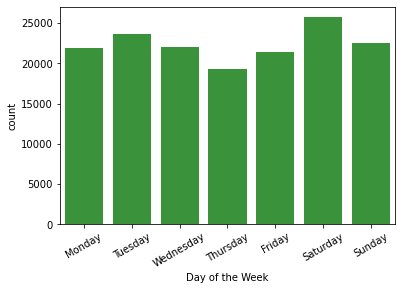

In [117]:
# take a look to the distribution of days of the week
base_color_day = sns.color_palette()[2]

sns.countplot(data=df_clean, x='week_day', color=base_color_day)
plt.xticks(rotation=30)
plt.xlabel('Day of the Week');

There is a nice variation in the renting day. We see a peak on saturday

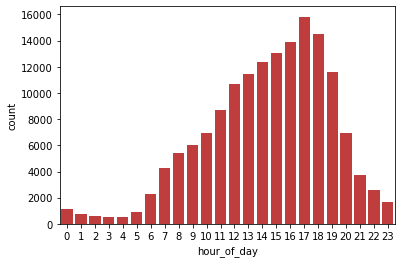

In [131]:
# take a look to the hour
base_color_hour = sns.color_palette()[3]

sns.countplot(data=df_clean, x='hour_of_day', color=base_color_hour);

we see a somewhat left skewed distribution with its peak at 17 o'clock

Text(0.5, 0, 'Customer type')

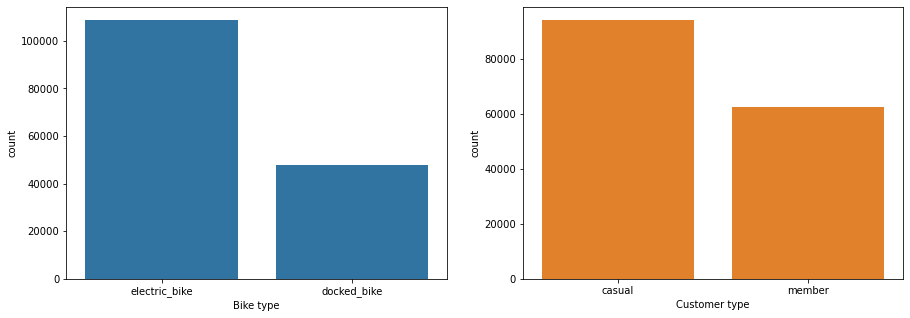

In [68]:
# take a look at the distribution of the type of the bike and the customer
plt.figure(figsize=[15,5])

# choose colors for the two features
base_color_btype = sns.color_palette()[0]
base_color_ctype = sns.color_palette()[1]

# plot the bars
plt.subplot(1,2,1)
sns.countplot(data=df_clean, x='rideable_type', color=base_color_btype)
plt.xlabel('Bike type')

plt.subplot(1,2,2)
sns.countplot(data=df_clean, x='member_casual', color=base_color_ctype)
plt.xlabel('Customer type')

given this results I expect the customer type to have an explanation power on the ride duration

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!